In [1]:
import pandas as pd
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt
import quantstats as qs

In [13]:
pathlist = Path("./results").glob('**/*.csv')
total_price = 0
total_wealth = 0
num_stocks = 0
num_better = 0
num_real_better = 0
higher_sharpe = []
higher_return = []
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    performance = pd.read_csv(path)
    performance.index = pd.DatetimeIndex(performance.Date)
    price = (1 + performance.price.pct_change()).cumprod()
    wealth = (1 + performance.wealth.pct_change()).cumprod()

    stock = price.pct_change(periods=21)
    strat = wealth.pct_change(periods=21)

    # print(strat.mean() / strat.std(), stock.mean() / stock.std())

    if strat.mean() / strat.std() > stock.mean() / stock.std():
        num_better += 1
        higher_sharpe.append(path.name[:-4])

    if strat.mean() > stock.mean():
        num_real_better += 1
        higher_return.append(path.name[:-4])

    total_price += price
    total_wealth += wealth
    num_stocks += 1

/tmp/ipykernel_95877/1436177279.py:22: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_95877/1436177279.py:22: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_95877/1436177279.py:22: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_95877/1436177279.py:22: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():
/tmp/ipykernel_95877/1436177279.py:22: RuntimeWarning: invalid value encountered in scalar divide
  if strat.mean() / strat.std() > stock.mean() / stock.std():


In [14]:
print(f"Number of times the strategy generates higher return: {num_real_better}")
print(f"Number of stocks beaten by the strategy: {num_better}")
print(f"Total number of obtained stocks: {num_stocks}")
print(f"Probability of beating the market: {num_better / num_stocks:.6f}")
print(f"Probability of actually beating the market: {num_real_better / num_stocks:.6f}")

Number of times the strategy generates higher return: 216
Number of stocks beaten by the strategy: 277
Total number of obtained stocks: 496
Probability of beating the market: 0.558468
Probability of actually beating the market: 0.435484


In [15]:
print(higher_sharpe)

['GM', 'AMZN', 'HAS', 'LVS', 'BBY', 'RL', 'TPR', 'KMX', 'DHI', 'RCL', 'CZR', 'GRMN', 'ABNB', 'DPZ', 'TSCO', 'NCLH', 'EXPE', 'HD', 'EBAY', 'BBWI', 'YUM', 'HLT', 'CCI', 'HST', 'SBAC', 'ESS', 'IRM', 'BXP', 'SPG', 'REG', 'DOC', 'PSA', 'MAA', 'KIM', 'O', 'CSGP', 'EQIX', 'VTR', 'CBRE', 'DLR', 'WY', 'MSCI', 'BEN', 'TROW', 'FIS', 'MET', 'MS', 'PNC', 'AFL', 'NDAQ', 'MKTX', 'CFG', 'WTW', 'CPAY', 'USB', 'COF', 'BRO', 'GS', 'WFC', 'BAC', 'KEY', 'JKHY', 'NTRS', 'SYF', 'CMA', 'ALL', 'HBAN', 'CB', 'AON', 'TFC', 'GPN', 'PYPL', 'MMC', 'RF', 'FITB', 'L', 'PRU', 'FDS', 'IVZ', 'AIG', 'GL', 'RJF', 'AIZ', 'FMC', 'AMCR', 'ECL', 'BALL', 'APD', 'EMN', 'IP', 'CTVA', 'LYB', 'FCX', 'WRK', 'STLD', 'NEM', 'MOS', 'NUE', 'CE', 'DD', 'SHW', 'CF', 'GOOG', 'TMUS', 'NWS', 'CMCSA', 'EA', 'IPG', 'GOOGL', 'NWSA', 'FOX', 'T', 'VZ', 'EL', 'COST', 'CHD', 'HRL', 'WBA', 'MKC', 'PG', 'SJM', 'TSN', 'CAG', 'DG', 'K', 'KDP', 'KO', 'GIS', 'PM', 'ADM', 'PEP', 'CPB', 'WMT', 'MNST', 'BA', 'ETN', 'MMM', 'PAYX', 'FDX', 'NOC', 'LMT', 'IEX'

In [16]:
print(higher_return)

['GM', 'ETSY', 'HAS', 'LVS', 'BBY', 'MHK', 'TPR', 'DHI', 'CZR', 'TSCO', 'EBAY', 'BBWI', 'LKQ', 'YUM', 'CCI', 'SBAC', 'BXP', 'SPG', 'REG', 'DOC', 'CPT', 'PSA', 'MAA', 'KIM', 'O', 'CSGP', 'VTR', 'CBRE', 'MSCI', 'BEN', 'TROW', 'FIS', 'MET', 'PNC', 'AFL', 'NDAQ', 'PFG', 'MKTX', 'CFG', 'WTW', 'USB', 'STT', 'COF', 'GS', 'BAC', 'KEY', 'JKHY', 'NTRS', 'CMA', 'ALL', 'HBAN', 'CB', 'AON', 'TFC', 'PYPL', 'RF', 'FITB', 'PRU', 'MTB', 'IVZ', 'AIG', 'GL', 'FMC', 'AMCR', 'BALL', 'ALB', 'APD', 'EMN', 'IP', 'CTVA', 'IFF', 'LYB', 'FCX', 'WRK', 'STLD', 'NEM', 'MOS', 'NUE', 'CE', 'DD', 'CF', 'TMUS', 'CMCSA', 'IPG', 'FOX', 'MTCH', 'T', 'VZ', 'WBD', 'EL', 'KHC', 'CHD', 'HRL', 'KMB', 'WBA', 'MKC', 'PG', 'SJM', 'TSN', 'CAG', 'DG', 'K', 'KDP', 'KO', 'GIS', 'PM', 'ADM', 'PEP', 'CPB', 'MNST', 'MMM', 'PAYX', 'NOC', 'LMT', 'IEX', 'CMI', 'UAL', 'AAL', 'J', 'LUV', 'GD', 'SWK', 'RTX', 'GNRC', 'JCI', 'RHI', 'VRSK', 'NSC', 'NDSN', 'TT', 'EXPD', 'FTV', 'DE', 'ROK', 'ADP', 'UPS', 'DTE', 'NEE', 'ED', 'PPL', 'CMS', 'AES', 'E

In [6]:
total_price

Date
2023-01-03           NaN
2023-01-04    503.496338
2023-01-05    498.227039
2023-01-06    510.253981
2023-01-09    510.600483
                 ...    
2023-12-22    586.863989
2023-12-26    590.308886
2023-12-27    591.190928
2023-12-28    591.830670
2023-12-29    589.581827
Name: price, Length: 250, dtype: float64

In [7]:
total_wealth

Date
2023-01-03           NaN
2023-01-04    496.000000
2023-01-05    496.000000
2023-01-06    496.000000
2023-01-09    496.000000
                 ...    
2023-12-22    537.189008
2023-12-26    539.389704
2023-12-27    539.935735
2023-12-28    540.532634
2023-12-29    539.233505
Name: wealth, Length: 250, dtype: float64

In [8]:
sp500 = total_price / num_stocks
ml_strat = total_wealth / num_stocks

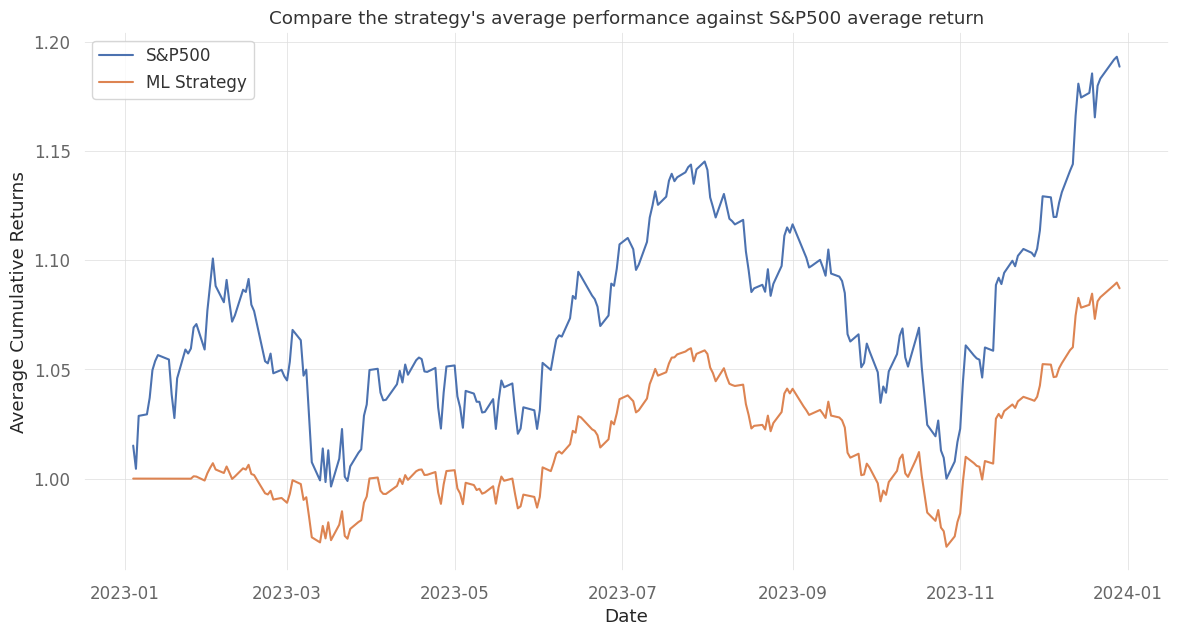

In [9]:
plt.figure(figsize=(14, 7)) 
plt.plot(price.index, sp500, label="S&P500") 
plt.plot(performance.index, ml_strat, label='ML Strategy')

plt.title(f"Compare the strategy's average performance against S&P500 average return")
plt.xlabel('Date') 
plt.ylabel('Average Cumulative Returns') 
plt.legend() 

In [10]:
returns = ml_strat.pct_change(periods=21)
text = "# Strategy Performance\n"
text += f"Monthly Expected Return: {returns.mean():.3f}\n"
text += f"Monthly Volatility: {returns.std():.3f}\n"
text += f"Sharpe ratio: {returns.mean() / returns.std():.3f}\n"
returns = sp500.pct_change(periods=21)
text += f"# S&P500 Performance\n"
text += f"Monthly Expected Return: {returns.mean():.3f}\n"
text += f"Monthly Volatility: {returns.std():.3f}\n"
text += f"Sharpe ratio: {returns.mean() / returns.std():.3f}\n"
print(text)

# Strategy Performance
Monthly Expected Return: 0.006
Monthly Volatility: 0.027
Sharpe ratio: 0.241
# S&P500 Performance
Monthly Expected Return: 0.010
Monthly Volatility: 0.045
Sharpe ratio: 0.222

